In [1]:
import os
import cv2 # OpenCV ou cv2 para tratamento de imagens;
import numpy as np # Numpy para trabalharmos com matrizes n-dimensionais
from keras.models import Sequential # Importando modelo sequencial
from keras.layers.convolutional import Conv2D, MaxPooling2D # Camada de convolução e max pooling
from keras.layers.core import Activation, Flatten, Dense # Camada da função de ativação, flatten, entre outros
from keras.layers import Rescaling # Camada de escalonamento
from keras.optimizers import Adam # optimizador Adam
from keras.callbacks import ModelCheckpoint # Classe utilizada para acompanhamento durante o treinamento onde definimos os atributos que serão considerados para avaliação
from tensorflow.data import AUTOTUNE
from tensorflow.keras.utils import image_dataset_from_directory # Função que carrega o dataset de um diretório
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping




In [3]:
def create_lenet(input_shape):

    model = Sequential()

    # Primeira camada do modelo:
    model.add(Conv2D(20, (5, 5), padding="same", input_shape=input_shape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Dropout(0.2))

    # Segunda camada do modelo:
    model.add(Conv2D(70, (5, 5), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Dropout(0.2))

    # Primeira camada fully connected
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))

    # Classificador softmax
    model.add(Dense(classes))
    model.add(Activation("softmax"))
    return model

In [26]:
if __name__ == "__main__":
    train_path = "D:\projetos\omdena\Machine_Learning_Projects\plant-diseases\ds_train" 
    models_path = "models" 
    width = 100 
    height = 100 
    depth = 3 
    classes = 5
    epochs = 20 
    init_lr = 1e-3 
    batch_size = 60 
    input_shape = (height, width, depth) 
    save_model = os.path.join(models_path, "lenet-{epoch:02d}-{accuracy:.3f}-{val_accuracy:.3f}.model")
    color_mode = {1:"grayscale", 3: "rgb"} 

    os.makedirs(models_path, exist_ok=True)

    train_ds = image_dataset_from_directory(
                            train_path,
                            seed=123,
                            label_mode='categorical',
                            validation_split=0.2,
                            subset="training",
                            color_mode=color_mode[depth],
                            image_size=(height, width),
                            batch_size=batch_size
    )

    val_ds = image_dataset_from_directory(
                            train_path,
                            seed=123,
                            label_mode='categorical',
                            validation_split=0.2,
                            subset="validation",
                            color_mode=color_mode[depth],
                            image_size=(height, width),
                            batch_size=batch_size
    )

    rescaling_layer = Rescaling(1./255)
    # pré-busca em buffer para que você possa produzir dados do disco sem que a E/S se torne um bloqueio
    train_ds = train_ds.map(lambda x, y: (rescaling_layer(x), y), num_parallel_calls=AUTOTUNE)
    val_ds = val_ds.map(lambda x, y: (rescaling_layer(x), y), num_parallel_calls=AUTOTUNE)

    model = create_lenet(input_shape)

    opt = Adam(lr=init_lr)

    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    model.summary()

    print("\n training network")




Found 35749 files belonging to 5 classes.
Using 28600 files for training.
Found 35749 files belonging to 5 classes.
Using 7149 files for validation.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 100, 100, 20)      1520      
                                                                 
 activation_16 (Activation)  (None, 100, 100, 20)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 50, 50, 20)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 50, 50, 20)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 70)        35070     
                                     

c:\Users\vandr\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:

checkpoint1 = ModelCheckpoint(save_model, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
checkpoint2 = ModelCheckpoint(save_model, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


callbacks_list = [checkpoint1,checkpoint2]





In [16]:
H = model.fit(train_ds,
        validation_data=val_ds,
        epochs=epochs,
        verbose=1,
        callbacks=callbacks_list
)

Epoch 1/20


477/477 [==============================] - ETA: 0s - loss: 0.5500 - accuracy: 0.8178
Epoch 1: val_loss improved from inf to 0.23164, saving model to models\lenet-01-0.818-0.915.model


INFO:tensorflow:Assets written to: models\lenet-01-0.818-0.915.model\assets


INFO:tensorflow:Assets written to: models\lenet-01-0.818-0.915.model\assets



Epoch 1: val_accuracy improved from -inf to 0.91523, saving model to models\lenet-01-0.818-0.915.model


INFO:tensorflow:Assets written to: models\lenet-01-0.818-0.915.model\assets


INFO:tensorflow:Assets written to: models\lenet-01-0.818-0.915.model\assets


477/477 [==============================] - 178s 371ms/step - loss: 0.5500 - accuracy: 0.8178 - val_loss: 0.2316 - val_accuracy: 0.9152
Epoch 2/20
477/477 [==============================] - ETA: 0s - loss: 0.2098 - accuracy: 0.9192
Epoch 2: val_loss improved from 0.23164 to 0.20046, saving model to models\lenet-02-0.919-0.916.model


INFO:tensorflow:Assets written to: models\lenet-02-0.919-0.916.model\assets


INFO:tensorflow:Assets written to: models\lenet-02-0.919-0.916.model\assets



Epoch 2: val_accuracy improved from 0.91523 to 0.91565, saving model to models\lenet-02-0.919-0.916.model


INFO:tensorflow:Assets written to: models\lenet-02-0.919-0.916.model\assets


INFO:tensorflow:Assets written to: models\lenet-02-0.919-0.916.model\assets


477/477 [==============================] - 179s 374ms/step - loss: 0.2098 - accuracy: 0.9192 - val_loss: 0.2005 - val_accuracy: 0.9157
Epoch 3/20
477/477 [==============================] - ETA: 0s - loss: 0.1593 - accuracy: 0.9378
Epoch 3: val_loss did not improve from 0.20046

Epoch 3: val_accuracy improved from 0.91565 to 0.91901, saving model to models\lenet-03-0.938-0.919.model


INFO:tensorflow:Assets written to: models\lenet-03-0.938-0.919.model\assets


INFO:tensorflow:Assets written to: models\lenet-03-0.938-0.919.model\assets


477/477 [==============================] - 175s 367ms/step - loss: 0.1593 - accuracy: 0.9378 - val_loss: 0.2019 - val_accuracy: 0.9190
Epoch 4/20
477/477 [==============================] - ETA: 0s - loss: 0.1183 - accuracy: 0.9533
Epoch 4: val_loss did not improve from 0.20046

Epoch 4: val_accuracy improved from 0.91901 to 0.92670, saving model to models\lenet-04-0.953-0.927.model


INFO:tensorflow:Assets written to: models\lenet-04-0.953-0.927.model\assets


INFO:tensorflow:Assets written to: models\lenet-04-0.953-0.927.model\assets


477/477 [==============================] - 174s 365ms/step - loss: 0.1183 - accuracy: 0.9533 - val_loss: 0.2087 - val_accuracy: 0.9267
Epoch 5/20
477/477 [==============================] - ETA: 0s - loss: 0.0966 - accuracy: 0.9629
Epoch 5: val_loss did not improve from 0.20046

Epoch 5: val_accuracy did not improve from 0.92670
477/477 [==============================] - 170s 356ms/step - loss: 0.0966 - accuracy: 0.9629 - val_loss: 0.3135 - val_accuracy: 0.9222
Epoch 6/20
477/477 [==============================] - ETA: 0s - loss: 0.0805 - accuracy: 0.9703
Epoch 6: val_loss did not improve from 0.20046

Epoch 6: val_accuracy did not improve from 0.92670
477/477 [==============================] - 171s 358ms/step - loss: 0.0805 - accuracy: 0.9703 - val_loss: 0.2510 - val_accuracy: 0.9253
Epoch 7/20
477/477 [==============================] - ETA: 0s - loss: 0.0639 - accuracy: 0.9776
Epoch 7: val_loss did not improve from 0.20046

Epoch 7: val_accuracy improved from 0.92670 to 0.92796, savin

INFO:tensorflow:Assets written to: models\lenet-07-0.978-0.928.model\assets


INFO:tensorflow:Assets written to: models\lenet-07-0.978-0.928.model\assets


477/477 [==============================] - 174s 364ms/step - loss: 0.0639 - accuracy: 0.9776 - val_loss: 0.2878 - val_accuracy: 0.9280
Epoch 8/20
477/477 [==============================] - ETA: 0s - loss: 0.0491 - accuracy: 0.9826
Epoch 8: val_loss did not improve from 0.20046

Epoch 8: val_accuracy improved from 0.92796 to 0.93076, saving model to models\lenet-08-0.983-0.931.model


INFO:tensorflow:Assets written to: models\lenet-08-0.983-0.931.model\assets


INFO:tensorflow:Assets written to: models\lenet-08-0.983-0.931.model\assets


477/477 [==============================] - 174s 364ms/step - loss: 0.0491 - accuracy: 0.9826 - val_loss: 0.2973 - val_accuracy: 0.9308
Epoch 9/20
477/477 [==============================] - ETA: 0s - loss: 0.0377 - accuracy: 0.9865
Epoch 9: val_loss did not improve from 0.20046

Epoch 9: val_accuracy did not improve from 0.93076
477/477 [==============================] - 169s 353ms/step - loss: 0.0377 - accuracy: 0.9865 - val_loss: 0.3058 - val_accuracy: 0.9301
Epoch 10/20
477/477 [==============================] - ETA: 0s - loss: 0.0403 - accuracy: 0.9852
Epoch 10: val_loss did not improve from 0.20046

Epoch 10: val_accuracy did not improve from 0.93076
477/477 [==============================] - 169s 353ms/step - loss: 0.0403 - accuracy: 0.9852 - val_loss: 0.3526 - val_accuracy: 0.9284
Epoch 11/20
477/477 [==============================] - ETA: 0s - loss: 0.0403 - accuracy: 0.9856
Epoch 11: val_loss did not improve from 0.20046

Epoch 11: val_accuracy improved from 0.93076 to 0.93090,

INFO:tensorflow:Assets written to: models\lenet-11-0.986-0.931.model\assets


INFO:tensorflow:Assets written to: models\lenet-11-0.986-0.931.model\assets


477/477 [==============================] - 172s 360ms/step - loss: 0.0403 - accuracy: 0.9856 - val_loss: 0.3790 - val_accuracy: 0.9309
Epoch 12/20
477/477 [==============================] - ETA: 0s - loss: 0.0310 - accuracy: 0.9894
Epoch 12: val_loss did not improve from 0.20046

Epoch 12: val_accuracy did not improve from 0.93090
477/477 [==============================] - 168s 352ms/step - loss: 0.0310 - accuracy: 0.9894 - val_loss: 0.3762 - val_accuracy: 0.9305
Epoch 13/20
477/477 [==============================] - ETA: 0s - loss: 0.0243 - accuracy: 0.9915
Epoch 13: val_loss did not improve from 0.20046

Epoch 13: val_accuracy improved from 0.93090 to 0.93216, saving model to models\lenet-13-0.991-0.932.model


INFO:tensorflow:Assets written to: models\lenet-13-0.991-0.932.model\assets


INFO:tensorflow:Assets written to: models\lenet-13-0.991-0.932.model\assets


477/477 [==============================] - 172s 361ms/step - loss: 0.0243 - accuracy: 0.9915 - val_loss: 0.4139 - val_accuracy: 0.9322
Epoch 14/20
477/477 [==============================] - ETA: 0s - loss: 0.0345 - accuracy: 0.9885
Epoch 14: val_loss did not improve from 0.20046

Epoch 14: val_accuracy did not improve from 0.93216
477/477 [==============================] - 169s 354ms/step - loss: 0.0345 - accuracy: 0.9885 - val_loss: 0.4522 - val_accuracy: 0.9281
Epoch 15/20
477/477 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9934
Epoch 15: val_loss did not improve from 0.20046

Epoch 15: val_accuracy did not improve from 0.93216
477/477 [==============================] - 170s 355ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.4098 - val_accuracy: 0.9301
Epoch 16/20
477/477 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9934
Epoch 16: val_loss did not improve from 0.20046

Epoch 16: val_accuracy did not improve from 0.93216
4

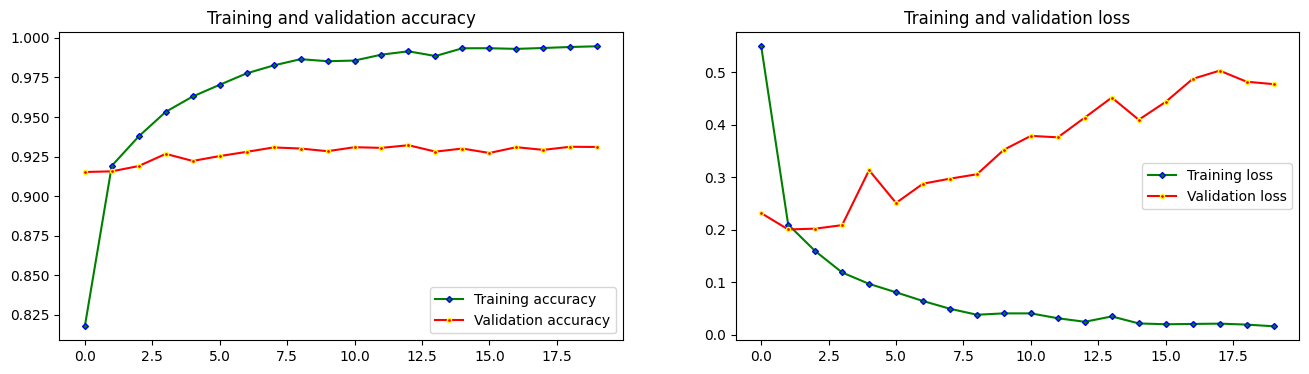

In [17]:
from matplotlib import pyplot as plt
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(16,4))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy', marker='D', mec='b', ms='3')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy', marker='o', mec='yellow', ms='3')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss', marker='D', mec='b', ms='3')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss', marker='o', mec='yellow', ms='3')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(H)

In [18]:
H

In [21]:
import pandas as pd
csv_file_path = r'D:\projetos\omdena\Machine_Learning_Projects\plant-diseases\history_v1.csv'

history_dict = H.history

# Convertendo o dicionário do histórico em um DataFrame pandas
history_df = pd.DataFrame(history_dict)

In [22]:
history_df 

,loss,accuracy,val_loss,val_accuracy
0,0.549973,0.817797,0.231636,0.915233
1,0.209811,0.919161,0.200463,0.915653
2,0.159261,0.937762,0.201940,0.919010
3,0.118346,0.953252,0.208667,0.926703
4,0.096581,0.962937,0.313514,0.922227
5,0.080491,0.970315,0.251030,0.925304
6,0.063886,0.977552,0.287772,0.927962
7,0.049090,0.982552,0.297343,0.930760
8,0.037702,0.986503,0.305760,0.930060
9,0.040316,0.985210,0.352553,0.928382


In [23]:
with open(csv_file_path, 'w') as f:
  history_df.to_csv(f, sep=';')

In [24]:
validacao_df = history_df[['val_loss', 'val_accuracy']]

print(validacao_df)

    val_loss  val_accuracy
0   0.231636      0.915233
1   0.200463      0.915653
2   0.201940      0.919010
3   0.208667      0.926703
4   0.313514      0.922227
5   0.251030      0.925304
6   0.287772      0.927962
7   0.297343      0.930760
8   0.305760      0.930060
9   0.352553      0.928382
10  0.379002      0.930899
11  0.376222      0.930480
12  0.413938      0.932158
13  0.452152      0.928102
14  0.409782      0.930060
15  0.443943      0.927263
16  0.487762      0.930899
17  0.503502      0.929221
18  0.482342      0.931179
19  0.477704      0.931039


In [25]:
csv_file_path_validacao = r'D:\projetos\omdena\Machine_Learning_Projects\plant-diseases\validacao_v1.csv'
with open(csv_file_path_validacao, 'w') as v:
  validacao_df.to_csv(v, sep=';')